# Week of Oct21 HW

## Question 1

### The simple linear regression model is used to describe the relationship between two variables: one is the predictor variable (independent variable), and the other is the outcome variable (dependent variable). In this model, we assume that the dependent variable can be linearly predicted from the independent variable, along with some error term.

### The predictor variable is usually represented by X, which is considered known or controllable. 

### The outcome variable, typically represented by Y, is the target we want to predict, and our task is to find a way to use X to predict Y. 

### The intercept is the estimated value of the outcome variable when the predictor variable is zero. 

### The slope represents the effect of changes in the predictor variable X on the outcome variable Y; it shows the expected increase in Y when X increases by one unit. 

### The error term represents the part of the model that cannot be fully explained, indicating the effect of other factors on Y in reality. The error term is usually assumed to follow a normal distribution because, in this way, the positive and negative errors can offset each other, making the overall average error zero.

### Given X, the distribution of Y is a normal distribution centered around alpha + beta*X with a variance equal to the variance of the error term. This characteristic causes each data point in the model to be randomly distributed around alpha + beta*X, forming a sample from a normal distribution.

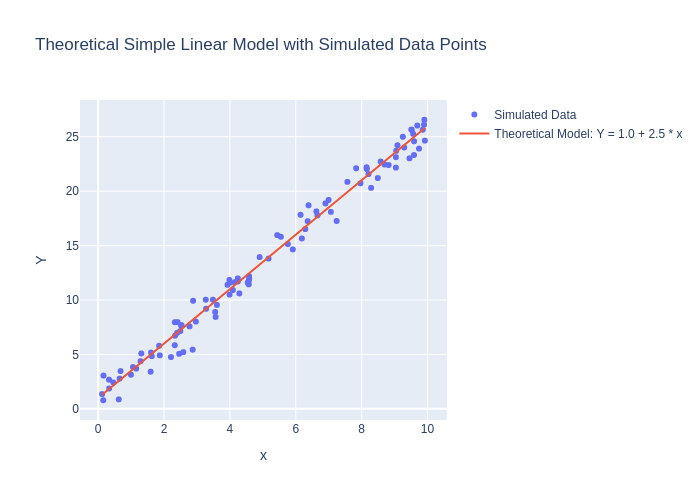

In [5]:
import numpy as np
import plotly.graph_objects as go
from scipy.stats import norm, uniform

# Define model parameters
n = 100  # Number of data points
beta0 = 1.0  # Intercept
beta1 = 2.5  # Slope
sigma = 1.0  # Standard deviation of the error term

# Generate predictors (x) uniformly and error terms normally
x = uniform.rvs(0, 10, size=n)  # Predictors from a uniform distribution
error = norm.rvs(0, sigma, size=n)  # Error from a normal distribution

# Calculate outcome Y based on the simple linear model
Y = beta0 + beta1 * x + error

# Visualization with Plotly
fig = go.Figure()
# Scatter plot of simulated data points
fig.add_trace(go.Scatter(x=x, y=Y, mode='markers', name='Simulated Data'))
# Line representing the theoretical model without errors
fig.add_trace(go.Scatter(x=x, y=beta0 + beta1 * x, mode='lines', name=f'Theoretical Model: Y = {beta0} + {beta1} * x'))
fig.update_layout(title='Theoretical Simple Linear Model with Simulated Data Points', xaxis_title='x', yaxis_title='Y')
fig.show(renderer="png")

### In this code, the independent variable X is obtained by randomly sampling within a specified interval. The error term is generated from a normal distribution with a mean of 0 and a standard deviation of sigma. Then, intercept and slope values are set. The regression line is generated using the simple linear regression formula, and a scatter plot is used to represent the simulated data points Y, which are normally distributed around the regression line.

In [4]:
# Summary of Chat with ChatGPT
print("1. Theoretical Simple Linear Model Setup:")
print("   - Discussed setting up a theoretical simple linear regression model in Python.")
print("   - Focused on generating predictors `x`, specifying intercept `beta0` and slope `beta1`,")
print("     and adding a normally distributed error term with standard deviation `sigma` to simulate real-world variability.")

print("\n2. Python Code for Theoretical Model:")
print("   - Provided code to:")
print("     a. Generate predictors `x` using `scipy.stats.uniform`.")
print("     b. Create a normally distributed error term using `scipy.stats.norm`.")
print("     c. Define `Y` as `Y = beta0 + beta1 * x + error`.")
print("     d. Visualize the theoretical line and simulated data points using Plotly, ensuring no fitted model was displayed.")

print("\n3. Visualization:")
print("   - Emphasized using `plotly.graph_objects` over `plotly.express` to avoid adding a fitted trendline,")
print("     which was outside the scope of this theoretical setup.")

1. Theoretical Simple Linear Model Setup:
   - Discussed setting up a theoretical simple linear regression model in Python.
   - Focused on generating predictors `x`, specifying intercept `beta0` and slope `beta1`,
     and adding a normally distributed error term with standard deviation `sigma` to simulate real-world variability.

2. Python Code for Theoretical Model:
   - Provided code to:
     a. Generate predictors `x` using `scipy.stats.uniform`.
     b. Create a normally distributed error term using `scipy.stats.norm`.
     c. Define `Y` as `Y = beta0 + beta1 * x + error`.
     d. Visualize the theoretical line and simulated data points using Plotly, ensuring no fitted model was displayed.

3. Visualization:
   - Emphasized using `plotly.graph_objects` over `plotly.express` to avoid adding a fitted trendline,
     which was outside the scope of this theoretical setup.


link with ChatGPT: https://chatgpt.com/share/672a9ca8-5828-800d-812f-1965ad9f4dc2

## Question 2

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     5440.
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           1.14e-87
Time:                        04:01:32   Log-Likelihood:                -141.23
No. Observations:                 100   AIC:                             286.5
Df Residuals:                      98   BIC:                             291.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1019      0.188      5.850      0.0

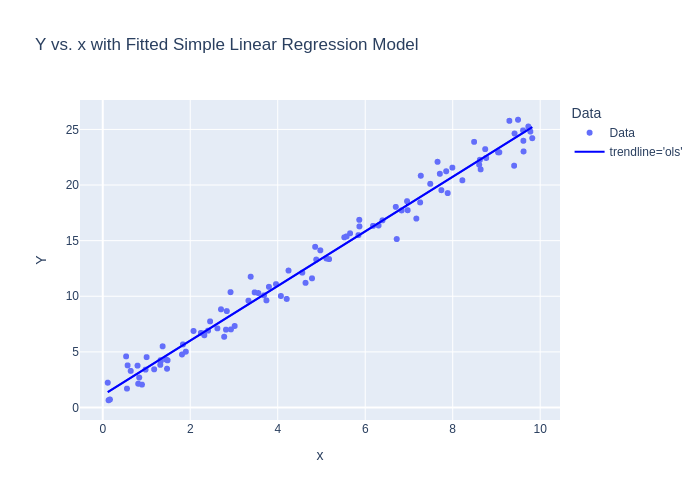

In [4]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf  # This library is for specifying and fitting statistical models using formulas, making it easy to build models like linear regression.
import plotly.express as px  # This is a plotting library that allows for quick and interactive visualizations.

# Define model parameters
n = 100  # Number of data points
beta0 = 1.0  # Intercept
beta1 = 2.5  # Slope
sigma = 1.0  # Standard deviation of the error term

# Generate predictors (x) uniformly and error terms normally
x = np.random.uniform(0, 10, n)  # Predictors from a uniform distribution
error = np.random.normal(0, sigma, n)  # Error from a normal distribution

# Calculate outcome Y based on the simple linear model
Y = beta0 + beta1 * x + error

# Combine the simulated x and Y into a pandas DataFrame object named df with the column names "x" and "Y"
df = pd.DataFrame({'x': x, 'Y': Y})

# Specify and fit a Simple Linear Regression model
# This line specifies the model formula "Y ~ x", indicating Y is the dependent variable and x is the independent variable.
model_data_specification = smf.ols("Y ~ x", data=df) 
# This line fits the model to the data, finding the best-fitting line based on the least squares method.
fitted_model = model_data_specification.fit()

# Examine the model output
# fitted_model.summary() provides a detailed summary of the regression results, including coefficients, R-squared value, F-statistic, and p-values.
print(fitted_model.summary())

# fitted_model.summary().tables[1] gives a concise table of the regression coefficients, standard errors, t-statistics, and p-values for each term in the model.
print(fitted_model.summary().tables[1])

# fitted_model.params displays the estimated coefficients for the intercept and slope (the model parameters).
print(fitted_model.params)

# fitted_model.params.values shows the same coefficients as a list or array format.
print(fitted_model.params.values)

# fitted_model.rsquared provides the R-squared value, which indicates the proportion of variance in Y explained by the model.
print(fitted_model.rsquared)

# Visualization with Plotly Express
# Adding a 'Data' column to help distinguish the scatter plot data in the legend.
df['Data'] = 'Data'  # This line creates a new column that labels all data points as "Data," which helps in showing the legend in the plot.

# This line creates a scatter plot with 'x' as the x-axis and 'Y' as the y-axis, color-coded by 'Data' and with a linear trendline added.
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x with Fitted Simple Linear Regression Model')

# This manually adds the fitted regression line to the plot, similar to the trendline added above. It uses the fitted values from the model for visualization.
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues, line=dict(color='blue'), name="trendline='ols'")

# Show plot (for submissions, use the png renderer as specified)
fig.show(renderer="png")


### difference between go.Scatter and px.scatter

### px.scatter can automatically generate a regression trendline, whereas go.Scatter requires manual addition. Therefore, px.scatter is suitable for quickly creating simple, basic charts, while go.Scatter is better suited for creating complex charts or those with additional customization needs.

In [5]:
# Chat Summary with ChatGPT

# 1. Model Setup and Simulation:
print("Define a theoretical Simple Linear Regression model with parameters:")
print(" - beta0 (intercept) = 1.0")
print(" - beta1 (slope) = 2.5")
print(" - sigma (standard deviation of the error term) = 1.0")
print("Simulate predictors (x) from a uniform distribution on [0, 10] and errors from a normal distribution.")
print("Calculate outcome variable Y using the equation: Y = beta0 + beta1 * x + error")

# 2. Library Explanation:
print("Explanation of Libraries Used:")
print(" - statsmodels.formula.api as smf: Used for specifying and fitting statistical models using formulas.")
print(" - plotly.express as px: A plotting library for quick, interactive visualizations.")

# 3. Model Fitting:
print("Model Fitting Steps:")
print("Using statsmodels to specify and fit a Simple Linear Regression model with Y as the dependent variable and x as the independent variable.")
print("Steps include:")
print(" - model_data_specification = smf.ols('Y ~ x', data=df): Specifies the regression model.")
print(" - fitted_model = model_data_specification.fit(): Fits the model to the data.")

# 4. Output and Interpretation:
print("Model Output and Interpretation:")
print(" - fitted_model.summary(): Provides a full summary of regression results.")
print(" - fitted_model.summary().tables[1]: Extracts a concise table of coefficients and related statistics.")
print(" - fitted_model.params: Shows estimated coefficients for intercept and slope.")
print(" - fitted_model.params.values: Returns coefficients as an array.")
print(" - fitted_model.rsquared: Displays the R-squared value, indicating the model's fit.")

# 5. Visualization:
print("Visualization Steps:")
print("Using Plotly Express to create a scatter plot with px.scatter, adding a linear trendline with trendline='ols'.")
print("For customization, manually add a fitted line with fig.add_scatter to control the visualization elements.")

Define a theoretical Simple Linear Regression model with parameters:
 - beta0 (intercept) = 1.0
 - beta1 (slope) = 2.5
 - sigma (standard deviation of the error term) = 1.0
Simulate predictors (x) from a uniform distribution on [0, 10] and errors from a normal distribution.
Calculate outcome variable Y using the equation: Y = beta0 + beta1 * x + error
Explanation of Libraries Used:
 - statsmodels.formula.api as smf: Used for specifying and fitting statistical models using formulas.
 - plotly.express as px: A plotting library for quick, interactive visualizations.
Model Fitting Steps:
Using statsmodels to specify and fit a Simple Linear Regression model with Y as the dependent variable and x as the independent variable.
Steps include:
 - model_data_specification = smf.ols('Y ~ x', data=df): Specifies the regression model.
 - fitted_model = model_data_specification.fit(): Fits the model to the data.
Model Output and Interpretation:
 - fitted_model.summary(): Provides a full summary of re

link with ChatGPT: https://chatgpt.com/share/672af670-5d88-800d-8d22-e7c643f5b2b1

## Question 3

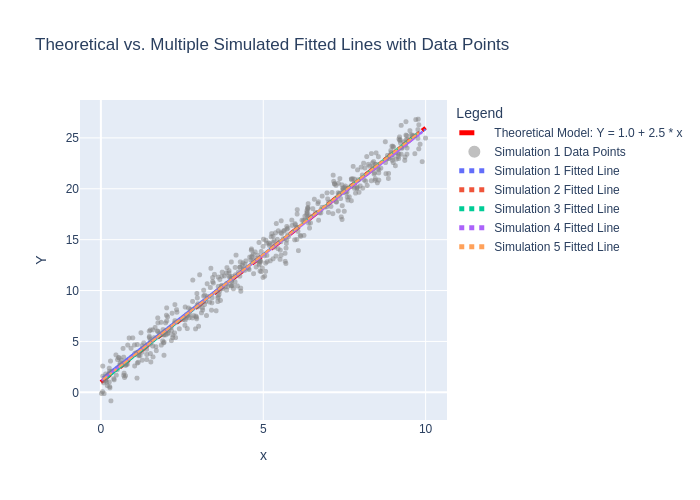

In [14]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.graph_objects as go
from scipy.stats import norm, uniform
import plotly.express as px

# Define model parameters
n = 100  # Number of data points
beta0 = 1.0  # Intercept of theoretical model
beta1 = 2.5  # Slope of theoretical model
sigma = 1.0  # Standard deviation of the error term
num_simulations = 5  # Number of simulations to run

# Generate x range for the theoretical line
x_range = np.array([0, 10])
y_theoretical = beta0 + beta1 * x_range

# Initialize figure
fig = go.Figure()

# Plot the theoretical model line in bold red for clarity
fig.add_trace(go.Scatter(x=x_range, y=y_theoretical, mode='lines', 
                         name=f'Theoretical Model: Y = {beta0} + {beta1} * x', 
                         line=dict(color='red', width=4, dash='dash')))

# Define a color palette for different simulation lines
colors = px.colors.qualitative.Plotly  # Using Plotly's qualitative color palette

# Run multiple simulations and add each fitted line and data points to the plot
for i in range(num_simulations):
    # Generate predictors (x) uniformly and error terms normally
    x = uniform.rvs(0, 10, size=n)
    error = norm.rvs(0, sigma, size=n)
    
    # Calculate outcome Y based on the simple linear model
    Y = beta0 + beta1 * x + error
    df = pd.DataFrame({'x': x, 'Y': Y})
    
    # Fit the model to the simulated data
    model = smf.ols("Y ~ x", data=df).fit()
    
    # Add the simulated data points for this simulation with light gray color
    fig.add_trace(go.Scatter(x=df['x'], y=df['Y'], mode='markers', 
                             name=f'Simulation {i+1} Data Points', 
                             marker=dict(size=5, opacity=0.5, color='gray'),
                             showlegend=(i == 0)))  # Show legend entry only for the first set of points

    # Add the fitted line for this simulation with a unique color
    fig.add_trace(go.Scatter(x=df['x'], y=model.fittedvalues, mode='lines', 
                             name=f'Simulation {i+1} Fitted Line', 
                             line=dict(width=2, color=colors[i % len(colors)], dash='dot')))

# Update layout for improved clarity
fig.update_layout(title='Theoretical vs. Multiple Simulated Fitted Lines with Data Points',
                  xaxis_title='x', yaxis_title='Y',
                  legend=dict(title='Legend', itemsizing='constant'))

# Show plot (use png renderer for submissions)
fig.show(renderer="png")


### Difference between the theoretical line and the simulated line: The theoretical line represents the linear relationship under ideal conditions, while the simulated fitted line is influenced by random error and therefore fluctuates around the theoretical line. As a result, even if the parameters remain unchanged, the actual sample regression line will deviate from the theoretical line due to random error.

### Role of random error: The random error term causes the simulated data to be distributed around the theoretical line, resulting in a fitted regression line that does not perfectly align with the theoretical line. This highlights that sample randomness can lead actual data to deviate from the theoretical model.

### Significance of multiple simulations: Through multiple simulations, we can display the distribution of regression lines generated by different samples, illustrating the uncertainty in fitting caused by sample variability.

### Purpose of the code: The code first generates a fixed theoretical line and then repeatedly simulates different fitted lines based on random samples. By plotting these fitted lines alongside the theoretical line on the same graph, we can see that the fitted lines do not perfectly align with the theoretical line. This visualization helps us understand the impact of the error term in real testing scenarios, emphasizing the importance of accounting for random error.

In [15]:
# Chat Summary

summary = """
1. Theoretical and Simulation Models: You provided code for generating a theoretical linear regression model and a simulated model with random noise. We discussed how to compare the two by visualizing multiple simulation lines alongside the theoretical line.

2. Adding Clarity to Visualizations: You requested adjustments to improve clarity in the visualization, including making the theoretical line more prominent and using unique colors for each simulation line. I updated the code to include a bold red theoretical line, semi-transparent data points, and distinct colors for each simulated line.

3. Explanation of Differences: I explained that the theoretical line represents the true relationship without random variation, while the simulation lines show the fitted models with random noise added. This comparison demonstrates the effect of sampling variation, with the simulation lines fluctuating around the theoretical line due to randomness in the data.
"""

print(summary)


1. Theoretical and Simulation Models: You provided code for generating a theoretical linear regression model and a simulated model with random noise. We discussed how to compare the two by visualizing multiple simulation lines alongside the theoretical line.

2. Adding Clarity to Visualizations: You requested adjustments to improve clarity in the visualization, including making the theoretical line more prominent and using unique colors for each simulation line. I updated the code to include a bold red theoretical line, semi-transparent data points, and distinct colors for each simulated line.

3. Explanation of Differences: I explained that the theoretical line represents the true relationship without random variation, while the simulation lines show the fitted models with random noise added. This comparison demonstrates the effect of sampling variation, with the simulation lines fluctuating around the theoretical line due to randomness in the data.



link with ChatGPT: https://chatgpt.com/share/672b0ec8-3eb8-800d-9eba-23090690fb38

## Question 4

### The fitted values are calculated using the model’s estimated coefficients, fitted_model.params. Specifically, the fitted value is equal to beta0 + beta1 * x, where beta0 and beta1 are the intercept and slope, respectively. In Python, fitted_model.fittedvalues automatically computes the fitted values for each x by substituting these estimated coefficients into the formula.

In [1]:
# chat summary

print("""
User asked how `fitted_model.fittedvalues` is derived from `fitted_model.summary().tables[1]`
with a focus on `fitted_model.params` or `fitted_model.params.values`.

Explanation:
`fitted_model.fittedvalues` represents predicted values of the dependent variable (y)
based on the regression equation: y_hat = beta_0 + beta_1 * x
where beta_0 (intercept) and beta_1 (slope) are obtained from `fitted_model.params`.

Derivation steps:
- Extract intercept (beta_0) and slope (beta_1) from `fitted_model.params`.
- For each observed value of x, compute the predicted y value (y_hat).
- The predicted values are stored in `fitted_model.fittedvalues`.
""")


User asked how `fitted_model.fittedvalues` is derived from `fitted_model.summary().tables[1]`
with a focus on `fitted_model.params` or `fitted_model.params.values`.

Explanation:
`fitted_model.fittedvalues` represents predicted values of the dependent variable (y)
based on the regression equation: y_hat = beta_0 + beta_1 * x
where beta_0 (intercept) and beta_1 (slope) are obtained from `fitted_model.params`.

Derivation steps:
- Extract intercept (beta_0) and slope (beta_1) from `fitted_model.params`.
- For each observed value of x, compute the predicted y value (y_hat).
- The predicted values are stored in `fitted_model.fittedvalues`.



link with ChatGPT: https://chatgpt.com/share/672b676a-7028-800d-9e5f-1ce85ecd06db 

## Question 5

In [ ]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

n,x_min,x_range,beta0,beta1,sigma = 20,5,5,2,3,5
x = stats.uniform(x_min, x_range).rvs(size=n)
errors = stats.norm(loc=0, scale=sigma).rvs(size=n)
Y = beta0 + beta1 * x + errors

df = pd.DataFrame({'x': x, 'y': Y})
model_data_specification = smf.ols("Y~x", data=df) 
fitted_model = model_data_specification.fit() 

df['Data'] = 'Data' # hack to add data to legend 
fig = px.scatter(df, x='x',  y='Y', color='Data', 
                 trendline='ols', title='Y vs. x')

# This is what `trendline='ols'` is
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

x_range = np.array([df['x'].min(), df['x'].max()])
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta0)+' + '+str(beta1)+' * x', 
                line=dict(dash='dot', color='orange'))

# Add vertical lines for residuals
for i in range(len(df)):
    fig.add_scatter(x=[df['x'][i], df['x'][i]],
                    y=[fitted_model.fittedvalues[i], df['Y'][i]],
                    mode='lines',
                    line=dict(color='red', dash='dash'),
                    showlegend=False)
    
# Add horizontal line at y-bar
fig.add_scatter(x=x_range, y=[df['Y'].mean()]*2, mode='lines',
                line=dict(color='black', dash='dot'), name='y-bar')

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

### When using the "ordinary least squares" (OLS) method, based on observed data, OLS selects a line that minimizes the sum of squared residuals. Residuals are the vertical distances between each data point and the fitted line. By adjusting the position and slope of this line, OLS minimizes the sum of these squared residuals. Squaring serves two purposes: first, it treats all residuals as positive values, ignoring direction; second, it emphasizes larger deviations, making the fitted line better match the overall trend of the data.

### In the visualization, the red dashed lines represent the residuals between each observed point and the fitted line. The OLS method aims to minimize the sum of the squares of these residuals.

In [5]:
# Chat Summary

summary = """
The code provided simulates a dataset following a simple linear regression model and visualizes it with a scatter plot and trendlines. It generates predictor values x from a uniform distribution and response values Y using parameters beta0 = 2, beta1 = 3, and an error term from a normal distribution. The code fits an OLS regression to the data and adds several elements to the plot:

1. A scatter plot of the simulated data points.
2. The OLS trendline calculated from the observed data.
3. The theoretical line based on initial parameters.
4. Vertical lines indicating residuals (differences between observed and fitted values).
5. A horizontal line at the mean of Y.

This visualization helps compare the OLS-fitted line with the theoretical model and observe the residuals.
"""

print(summary)


The code provided simulates a dataset following a simple linear regression model and visualizes it with a scatter plot and trendlines. It generates predictor values x from a uniform distribution and response values Y using parameters beta0 = 2, beta1 = 3, and an error term from a normal distribution. The code fits an OLS regression to the data and adds several elements to the plot:

1. A scatter plot of the simulated data points.
2. The OLS trendline calculated from the observed data.
3. The theoretical line based on initial parameters.
4. Vertical lines indicating residuals (differences between observed and fitted values).
5. A horizontal line at the mean of Y.

This visualization helps compare the OLS-fitted line with the theoretical model and observe the residuals.



link with ChatGPT: https://chatgpt.com/share/672bd32e-8aa4-800d-b2d7-4bc9a78d6d90

## Question 6

### 1-((Y-fitted_model.fittedvalues)**2).sum()/((Y-Y.mean())**2).sum()

### Here is the definition formula for R-Squared. R-Squared is a metric used to assess the fit of the model, representing the proportion of variance in Y explained by the model. If the value is closer to 1, it indicates a better model fit. Conversely, if the value is closer to 0, it suggests a poorer model fit.

### fitted_model.rsquared

### This is the R-Squared value provided by the statsmodels library, a direct implementation of the formula above. It automatically calculates and outputs the R-Squared, which is also used to assess the model's accuracy and fit.

### np.corrcoef(Y, fitted_model.fittedvalues)[0,1]**2

### This calculates the correlation coefficient between the actual values Y and the fitted values, then squares it. Although this is not a direct calculation of R-Squared, the resulting value is equal to R-Squared and represents the model's ability to explain the variance in Y.

### np.corrcoef(Y, x)[0,1]**2

### This also is not a direct calculation of R-Squared, but it is equal to the R-Squared value. This expression calculates the square of the correlation coefficient between the actual values Y and the independent variable X.

In [2]:
# Chat Summary Code to simulate our conversation

def chat_summary():
    # User's question
    user_question = """
    User asked: "What do these four expressions do?"
    1. 1 - ((Y - fitted_model.fittedvalues) ** 2).sum() / ((Y - Y.mean()) ** 2).sum()
    2. fitted_model.rsquared
    3. np.corrcoef(Y, fitted_model.fittedvalues)[0,1]**2
    4. np.corrcoef(Y, x)[0,1]**2
    """

    # Assistant's explanation
    assistant_response = """
    Assistant explained each expression:
    
    1. The first expression manually calculates R-squared by comparing the variance of residuals with the total variance of Y.
    2. The second expression uses the rsquared attribute from the fitted model to directly obtain R-squared.
    3. The third expression calculates R-squared based on the squared correlation coefficient between Y and the model's fitted values.
    4. The fourth expression provides an R-squared-like metric based on the squared correlation between Y and the predictor x, relevant in simple linear regression.
    
    Each of these approaches relates to understanding the proportion of variance in Y explained by the model.
    """

    # Print the conversation summary
    print(user_question)
    print(assistant_response)

# Run the chat summary to simulate the conversation
chat_summary()


    User asked: "What do these four expressions do?"
    1. 1 - ((Y - fitted_model.fittedvalues) ** 2).sum() / ((Y - Y.mean()) ** 2).sum()
    2. fitted_model.rsquared
    3. np.corrcoef(Y, fitted_model.fittedvalues)[0,1]**2
    4. np.corrcoef(Y, x)[0,1]**2
    

    Assistant explained each expression:
    
    1. The first expression manually calculates R-squared by comparing the variance of residuals with the total variance of Y.
    2. The second expression uses the rsquared attribute from the fitted model to directly obtain R-squared.
    3. The third expression calculates R-squared based on the squared correlation coefficient between Y and the model's fitted values.
    4. The fourth expression provides an R-squared-like metric based on the squared correlation between Y and the predictor x, relevant in simple linear regression.
    
    Each of these approaches relates to understanding the proportion of variance in Y explained by the model.
    


link with ChatGPT: https://chatgpt.com/share/672be76c-0a54-800d-a3a3-453c09fce566

## Quesion 7

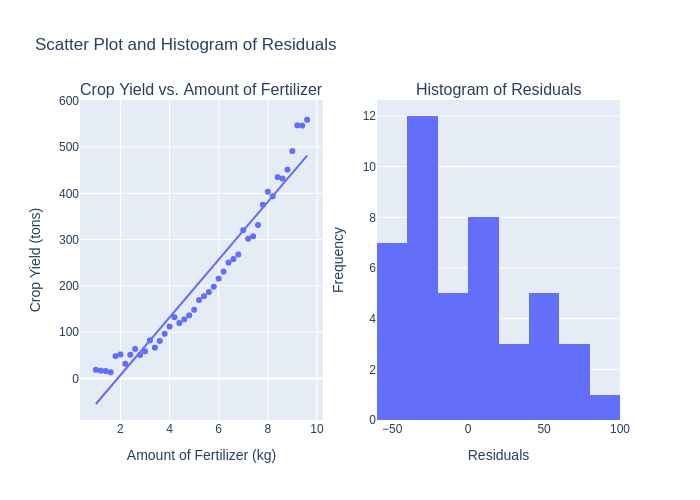

In [9]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

### In this model, we analyzed the relationship between fertilizer usage (independent variable) and crop yield (dependent variable). We assumed this is a simple linear regression model that meets the assumptions of linearity, constant variance, and normality of errors. However, through plotting, we found that these assumptions do not hold.

### 1. The data points in the plot do not completely exhibit a linear relationship but rather display a certain non-linear trend. This suggests that the relationship between the independent and dependent variables may not satisfy the linearity assumption of a simple linear regression model.

### 2. We plotted a histogram of the residuals and found that the residuals are not distributed constantly but increase as fertilizer usage increases, meaning the assumption of constant variance does not hold.

### 3. By observing the distribution of the residuals in the histogram, we found that the residuals do not strictly follow a normal distribution, which may affect the model’s fit to the data.

### In conclusion, this dataset does not fully meet the assumptions of a simple linear regression model.

In [8]:
# Chat Log Summary

chat_log = [
    {
        "User Question": "Indicate a couple of the assumptions of the Simple Linear Regression model specification that do not seem compatible with the example data.",
        "Assistant Response": [
            "Identified potential violations of the Simple Linear Regression (SLR) model assumptions:",
            "- Linearity Assumption: Data suggests a non-linear relationship between fertilizer and crop yield.",
            "- Normality of Residuals: Residuals may not be normally distributed, as seen in the histogram."
        ]
    },
    {
        "User Question": "More detail",
        "Assistant Response": [
            "Provided detailed explanations of assumption violations:",
            "- Linearity: Explained how non-linear patterns indicate linearity assumption violation.",
            "- Normality: Described how histogram and Q-Q plots reveal deviations from normality.",
            "- Homoscedasticity: Discussed heteroscedasticity in residuals, suggesting violation of constant variance."
        ]
    },
    {
        "User Question": "The error term is not normal distribution too",
        "Assistant Response": [
            "Acknowledged user's observation about non-normality of the error term, confirmed the violation of normality assumption for residuals."
        ]
    },
    {
        "User Question": "Chat summary",
        "Assistant Response": [
            "Summarized key violations of assumptions for the Simple Linear Regression model in user's data:",
            "- Linearity, Normality of Residuals, and Homoscedasticity."
        ]
    }
]

# Print the chat log summary
for log in chat_log:
    print("User Question:", log["User Question"])
    print("Assistant Response:")
    for response in log["Assistant Response"]:
        print("-", response)
    print()


User Question: Indicate a couple of the assumptions of the Simple Linear Regression model specification that do not seem compatible with the example data.
Assistant Response:
- Identified potential violations of the Simple Linear Regression (SLR) model assumptions:
- - Linearity Assumption: Data suggests a non-linear relationship between fertilizer and crop yield.
- - Normality of Residuals: Residuals may not be normally distributed, as seen in the histogram.

User Question: More detail
Assistant Response:
- Provided detailed explanations of assumption violations:
- - Linearity: Explained how non-linear patterns indicate linearity assumption violation.
- - Normality: Described how histogram and Q-Q plots reveal deviations from normality.
- - Homoscedasticity: Discussed heteroscedasticity in residuals, suggesting violation of constant variance.

User Question: The error term is not normal distribution too
Assistant Response:
- Acknowledged user's observation about non-normality of the e

link with ChatGPT: https://chatgpt.com/share/672bf2cc-7628-800d-8e92-7a3f31ca40f7

# Week of Nov04 HW

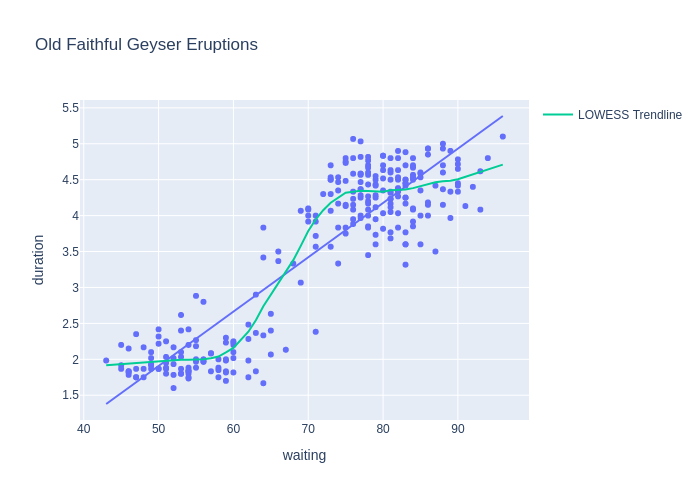

In [2]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm
import pandas as pd  # Added import for pandas

# Load the "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')  # Linear regression trendline

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # LOWESS function from statsmodels
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])

fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer="png")  # For GitHub and MarkUs submissions

## Question 8

In [3]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        19:34:31   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### We assume the null hypothesis H0 is that there is no linear relationship between 'waiting' and 'duration', meaning beta1=0. According to the output of the regression model, the p-value for the 'waiting' variable is close to 0. Therefore, we have very strong evidence against the null hypothesis, indicating a significant linear relationship between 'waiting' and 'duration'.

## Question 9

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


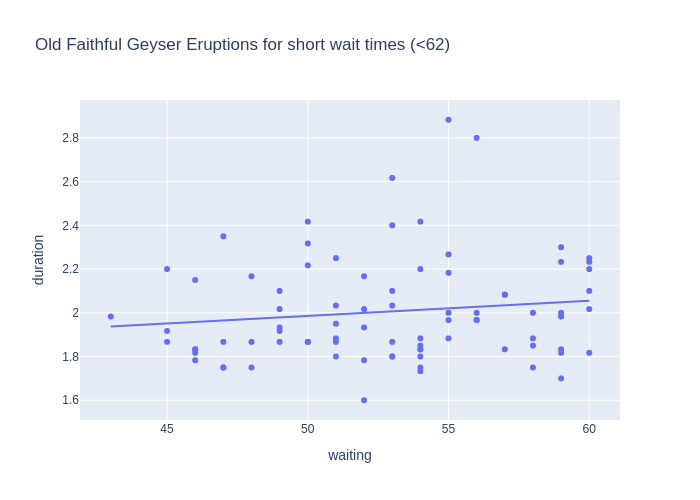

In [19]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4140      0.288      4.915      0.000       0.842       1.986
waiting        0.0114      0.005      2.127      0.036       0.001       0.022


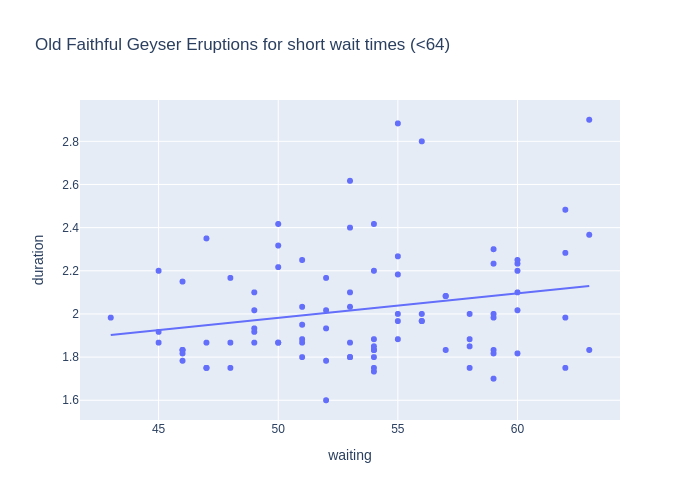

In [20]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


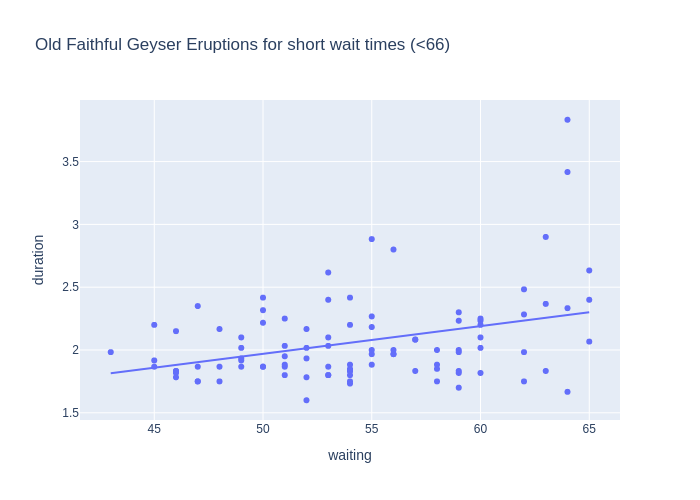

In [21]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 66
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

### When 'short_wait_limit = 62', the p-value for 'waiting' is 0.238, indicating that within the range of wait times less than 62 minutes, there is insufficient evidence to support a significant linear relationship between 'waiting' and 'duration'.

### When 'short_wait_limit = 64', the p-value for 'waiting' is 0.036, which is less than 0.05, indicating a significant linear relationship between 'waiting' and 'duration' within the range of wait times less than 64 minutes. 

### When 'short_wait_limit = 66', the p-value for 'waiting' is close to 0, suggesting a very significant linear relationship between 'waiting' and 'duration' within the range of wait times less than 66 minutes.  

### In summary, as 'short_wait_limit' increases (from 62 to 66 minutes), the linear relationship between 'waiting' and 'duration' becomes gradually more significant. This indicates that within the range of shorter wait times, although there is no significant relationship around 62 minutes, a significant relationship emerges around 63 minutes (i.e., when 'short_wait_limit' is increased to 64 or 66 minutes). This supports the significant impact of 'waiting' on 'duration' within the broader range of shorter wait times.

## Question 10

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


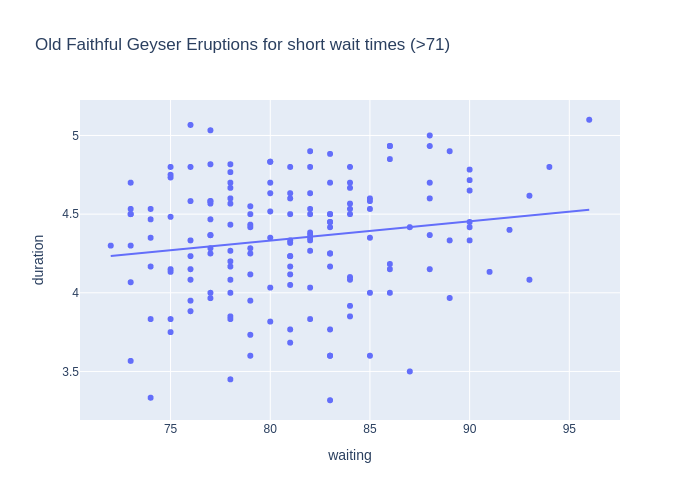

In [22]:
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Observed Slope: 0.012244029446523483
95% Bootstrapped Confidence Interval for Slope: [0.0007838  0.02265655]
Simulated p-value under H0: 0.03


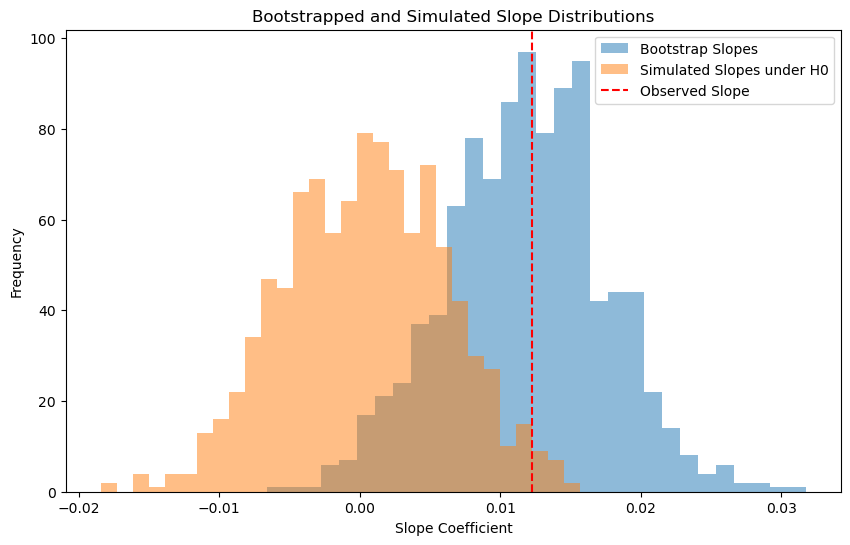

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import scipy.stats as stats
import matplotlib.pyplot as plt

# Load dataset
old_faithful = sns.load_dataset('geyser')

# Filter subset with long waiting times
long_wait_limit = 71
long_wait = old_faithful['waiting'] > long_wait_limit

# Calculate observed slope in the actual data
observed_model = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit()
observed_slope = observed_model.params.iloc[1]  # Use iloc to access slope coefficient
print(f"Observed Slope: {observed_slope}")

# 1. Bootstrap sampling to generate slope distribution
bootstrapped_slope_coefficients = []
n_bootstrap = 1000  # Number of bootstrap samples

for _ in range(n_bootstrap):
    # Resample with replacement from the long wait subset
    bootstrap_sample = old_faithful[long_wait].sample(n=long_wait.sum(), replace=True)
    # Fit model to bootstrap sample and record slope coefficient
    bootstrap_model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    bootstrapped_slope_coefficients.append(bootstrap_model.params.iloc[1])

# Convert to array for calculations
bootstrapped_slope_coefficients = np.array(bootstrapped_slope_coefficients)

# Calculate 95% bootstrap confidence interval for slope
ci_bootstrap = np.quantile(bootstrapped_slope_coefficients, [0.025, 0.975])
print(f"95% Bootstrapped Confidence Interval for Slope: {ci_bootstrap}")

# 2. Simulate slope distribution under the null hypothesis (no linear relationship)
simulated_slope_coefficients = []

for _ in range(n_bootstrap):
    # Create simulated data under null hypothesis (slope = 0)
    old_faithful_simulation = old_faithful[long_wait].copy()
    old_faithful_simulation['duration'] = (
        1.65 + 0 * old_faithful_simulation['waiting'] + stats.norm(loc=0, scale=0.37).rvs(size=long_wait.sum())
    )
    # Fit model to simulated data and record slope coefficient
    simulated_model = smf.ols('duration ~ waiting', data=old_faithful_simulation).fit()
    simulated_slope_coefficients.append(simulated_model.params.iloc[1])

# Convert to array for calculations
simulated_slope_coefficients = np.array(simulated_slope_coefficients)

# Calculate p-value for observed slope compared to null distribution
p_value_simulation = (np.abs(simulated_slope_coefficients) >= np.abs(observed_slope)).mean()
print(f"Simulated p-value under H0: {p_value_simulation}")

# 3. Visualization of both distributions with observed slope
plt.figure(figsize=(10, 6))
plt.hist(bootstrapped_slope_coefficients, bins=30, alpha=0.5, label='Bootstrap Slopes')
plt.hist(simulated_slope_coefficients, bins=30, alpha=0.5, label='Simulated Slopes under H0')
plt.axvline(x=observed_slope, color='red', linestyle='--', linewidth=1.5, label='Observed Slope')
plt.legend()
plt.xlabel('Slope Coefficient')
plt.ylabel('Frequency')
plt.title('Bootstrapped and Simulated Slope Distributions')
plt.show()

### From the results, we observe a slope of 0.0122, indicating a positive relationship between 'waiting' and 'duration'. The 95% confidence interval is [0.0008, 0.0227]. Since this confidence interval does not include zero, we can conclude that the linear relationship between 'waiting' and 'duration' is significant. Under the null hypothesis of a zero slope, the simulated p-value is 0.03, which is less than 0.05. Therefore, we have sufficient evidence to reject the null hypothesis, indicating a linear relationship between 'waiting' and 'duration'. Overall, we conclude that there is a linear relationship between 'waiting' and 'duration'.

In [29]:
# Chat summary

print("1. Objective:")
print("- User asked how to analyze the relationship between `waiting` and `duration` in the \"long wait times\" subset.")
print("- Response: Provided guidance on calculating the observed slope coefficient as a baseline for comparison.\n")

print("2. Bootstrapped Distribution:")
print("- User requested code to generate a bootstrapped distribution of slope coefficients.")
print("- Response: Provided code for resampling data to calculate slope coefficients and a 95% confidence interval.\n")

print("3. Null Hypothesis Simulation:")
print("- User asked how to create a distribution of slope coefficients under the null hypothesis (no linear relationship).")
print("- Response: Provided code to simulate data with a slope of zero and calculate slope coefficients to form the null distribution.\n")

print("4. Overlay Plot:")
print("- User wanted to overlay the bootstrapped and simulated distributions on the same graph.")
print("- Response: Demonstrated how to use `matplotlib` to plot both distributions on one graph, with a reference line for the observed slope.\n")

print("5. Error Handling:")
print("- User encountered a `TypeError` due to `renderer=\"png\"` in `plt.show()`.")
print("- Response: Clarified that `renderer` is only applicable for `plotly`, not `matplotlib`, and advised removing it.\n")

print("6. Interpretation:")
print("- User asked for an explanation of the code’s purpose and results.")
print("- Response: Explained how the bootstrapped confidence interval, null hypothesis distribution, and p-value indicate the significance of the observed slope.\n")

# (Actual analysis code provided in prior responses accomplishes the implementation of these steps.)

1. Objective:
- User asked how to analyze the relationship between `waiting` and `duration` in the "long wait times" subset.
- Response: Provided guidance on calculating the observed slope coefficient as a baseline for comparison.

2. Bootstrapped Distribution:
- User requested code to generate a bootstrapped distribution of slope coefficients.
- Response: Provided code for resampling data to calculate slope coefficients and a 95% confidence interval.

3. Null Hypothesis Simulation:
- User asked how to create a distribution of slope coefficients under the null hypothesis (no linear relationship).
- Response: Provided code to simulate data with a slope of zero and calculate slope coefficients to form the null distribution.

4. Overlay Plot:
- User wanted to overlay the bootstrapped and simulated distributions on the same graph.
- Response: Demonstrated how to use `matplotlib` to plot both distributions on one graph, with a reference line for the observed slope.

5. Error Handling:
- Use

link with ChatGPT: https://chatgpt.com/share/672d5b73-9b6c-800d-a093-0e1971eeca0a

## Question 11

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


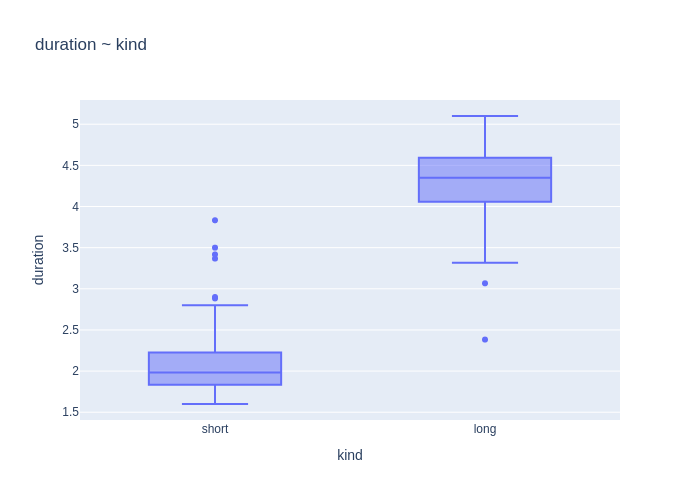

In [28]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

### Firstly, we reclassified the wait times, defining those less than 68 seconds as "short" and those greater than or equal to 68 seconds as "long." Using "kind" as an indicator variable, we constructed a model based on wait time categories.

### The previous model treated "waiting" as a continuous variable, but the current model considers wait time as a categorical variable (long and short). It no longer assumes a linear relationship between wait time and eruption duration but rather views it as an average difference between different categories.

### In this hypothesis test, we set the null hypothesis as there being no significant difference in the average eruption duration between the long and short groups. After conducting the test, we obtained a p-value of 0, providing strong evidence to reject the null hypothesis, indicating that there is a significant difference in the average eruption duration between the long and short groups.

### The box plot also shows the distribution of eruption durations for the two groups, indicating a clear difference between them.

## Question 12

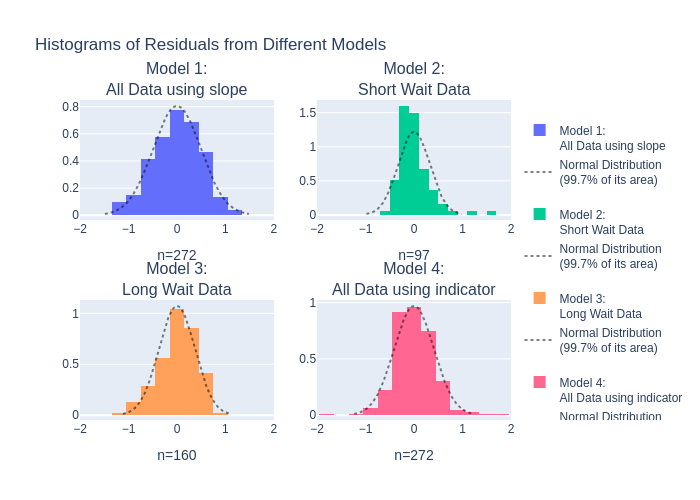

In [31]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

### The model that best satisfies the normality assumption is Model 1, as its residual histogram closely aligns with the normal distribution dashed line, showing clear symmetry and a bell-shaped curve. The other models (Model 2, Model 3, Model 4) do not fully satisfy the normality assumption due to skewness or distribution shapes that do not align well with the normal distribution.

## Question 13

## permuation test

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns

# Load dataset and define 'kind' column
old_faithful = sns.load_dataset('geyser')
old_faithful['kind'] = np.where(old_faithful['waiting'] < old_faithful['waiting'].median(), 'short', 'long')

# Observed Mean Difference
observed_diff = old_faithful.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]

# Parameters
num_permutations = 1000  # Number of permutations in each test
num_tests = 10           # Number of times to repeat the permutation test

# Store p-values and sample differences across multiple tests
all_p_values = []
all_sample_diffs = []

for test in range(num_tests):
    permuted_diffs = []

    # Perform the permutations
    for _ in range(num_permutations):
        # Shuffle 'kind' labels and calculate the permuted mean difference
        shuffled_df = old_faithful.assign(kind_shuffled=old_faithful['kind'].sample(frac=1).values)
        permuted_diff = shuffled_df.groupby('kind_shuffled')['duration'].mean().iloc[::-1].diff().values[1]
        permuted_diffs.append(permuted_diff)
    
    # Calculate p-value for this test
    p_value = np.mean(np.abs(permuted_diffs) >= np.abs(observed_diff))
    all_p_values.append(p_value)

    # Select a random sample difference from this test
    sample_diff = np.random.choice(permuted_diffs)
    all_sample_diffs.append(sample_diff)

# Summary Results
print(f"Observed Difference: {observed_diff}")
print(f"P-values from Multiple Permutation Tests: {all_p_values}")
print(f"Sample Differences from Multiple Permutation Tests: {all_sample_diffs}")
print(f"Average P-value across Tests: {np.mean(all_p_values)}")
print(f"Average Sample Difference across Tests: {np.mean(all_sample_diffs)}")


Observed Difference: 1.7650425048669693
P-values from Multiple Permutation Tests: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Sample Differences from Multiple Permutation Tests: [0.1397204196409252, 0.054922669262383206, 0.08407603287908305, 0.06988178671858059, -0.1755683538827606, -0.19393997404282937, -0.0019572788232751215, 0.0569231018818952, 0.10806651524983746, 0.06905807916937068]
Average P-value across Tests: 0.0
Average Sample Difference across Tests: 0.02111829980532103


## 95% bootstrap confidence interval

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns

# Load dataset
old_faithful = sns.load_dataset('geyser')

# Calculate the Observed Mean Difference
observed_diff = old_faithful.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]

# Number of bootstrap samples
num_bootstraps = 1000
bootstrapped_mean_diffs = []

# Bootstrap procedure
for _ in range(num_bootstraps):
    # Resample within each group
    bootstrapped_df = old_faithful.groupby('kind').apply(lambda x: x.sample(frac=1, replace=True)).reset_index(drop=True)
    # Calculate the mean difference between the groups for this bootstrap sample
    bootstrapped_diff = bootstrapped_df.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]
    bootstrapped_mean_diffs.append(bootstrapped_diff)

# Calculate the 95% confidence interval
ci_lower, ci_upper = np.quantile(bootstrapped_mean_diffs, [0.025, 0.975])

# Check if the observed difference is significant (outside of the confidence interval)
is_significant = not (ci_lower <= observed_diff <= ci_upper)

# Sample of bootstrapped differences for display
sample_bootstrapped_diffs = bootstrapped_mean_diffs[:10]  # First 10 bootstrapped differences for example

# Output results
print(f"Observed Mean Difference: {observed_diff}")
print(f"95% Bootstrap Confidence Interval: ({ci_lower}, {ci_upper})")
print(f"Sample of Bootstrapped Differences: {sample_bootstrapped_diffs}")
print(f"Is the observed difference significant?: {is_significant}")

Observed Mean Difference: 2.20360023255814
95% Bootstrap Confidence Interval: (2.0959241162790696, 2.2948266162790696)
Sample of Bootstrapped Differences: [2.2518723255813957, 2.1636439534883722, 2.214738604651163, 2.1632311627906975, 2.180160930232558, 2.1842902325581397, 2.245896976744186, 2.1763820930232565, 2.1981746511627906, 2.21236023255814]
Is the observed difference significant?: False


### Principle of permuation test

### The permutation test is used to assess whether the mean difference between the "short wait" and "long wait" groups is statistically significant. The core idea is to "shuffle the labels" to simulate the scenario under the null hypothesis of no difference. Specifically, the labels for "short wait" and "long wait" are randomly reassigned (i.e., shuffled) across the dataset. After relabeling, the mean difference between the "short wait" and "long wait" groups is recalculated. This process is repeated many times, producing a distribution of mean differences under the permutation. The observed mean difference is then compared to this permutation distribution. If the observed mean difference falls outside the confidence interval of the permutation distribution or if the p-value is very small, it suggests that the difference is statistically significant. The permutation test helps to determine whether the observed difference is likely due to random chance by simulating data under the assumption of no true difference.

### Principle of 95% bootstrap confidence interval

### Bootstrapping repeatedly samples with replacement from the original two groups to create many resampled datasets of the same size as the original data. For each resampled dataset, the mean difference between the "long wait" and "short wait" groups is calculated. This process results in a distribution of mean differences, and the 2.5% and 97.5% quantiles of this bootstrapped distribution are used to construct a 95% confidence interval. If the observed mean difference falls within this confidence interval, it suggests that the difference between the two groups is statistically significant. Conversely, if the confidence interval does not contain the observed mean difference, we have evidence that the difference between the "long wait" and "short wait" groups is not significant.

## (b)

## similarities

### All three methods are used to test whether there is a significant difference between the "short wait" and "long wait" groups. Each provides a quantitative approach to measure the difference between the two groups.

## difference

## Model Assumptions:

### Permutation Test and Bootstrapping: Do not rely on specific distributional assumptions, making them non-parametric methods. Indicator Variable Model: Typically a regression model that requires assumptions (such as normality of errors and homoscedasticity) to ensure valid estimates.

## Interpretation of Results:

### Permutation Test: Provides a p-value, helping to assess the significance of the mean difference. Bootstrap Confidence Interval: Offers a confidence interval for the mean difference, indicating the range and reliability of the difference. Indicator Variable Model: Quantifies the effect of the categorical variable (short wait or long wait) through regression coefficients, and can interpret the effect of categories while controlling for other variables.

## Applicable Scenarios:

### Permutation Test and Bootstrapping: Suitable for smaller sample sizes or when normality assumptions are not met. Indicator Variable Model: Useful when the regression model assumptions hold, suitable for more complex data modeling, especially when controlling for multiple variables.

In [51]:
# Chat Summary 

chat_summary = {
    "Permutation Test": {
        "Description": (
            "You asked about implementing a permutation test by shuffling labels. We created code "
            "that shuffles the 'kind' labels (e.g., 'short' and 'long') in the Old Faithful Geyser dataset, "
            "then calculates the difference in mean durations across 1000 permutations. We calculated a p-value "
            "based on how many permuted mean differences were as extreme as the observed difference, and noted "
            "that a p-value of 0 indicates a significant difference between 'short' and 'long' wait times."
        ),
        "Code_Snippet": "Permutation test code provided, calculating observed difference, p-value, and sample difference."
    },
    "Bootstrap Confidence Interval": {
        "Description": (
            "We implemented a 95% bootstrap confidence interval for the difference in means. By repeatedly resampling "
            "within each group, we generated a distribution of mean differences, then used the 2.5th and 97.5th percentiles "
            "to form the confidence interval. We included code that outputs the observed difference, confidence interval, "
            "and a sample of bootstrapped differences, and checks if the observed difference falls outside the confidence interval."
        ),
        "Code_Snippet": "Bootstrap confidence interval code provided, including observed difference, confidence interval, and sample."
    },
    "Comparison of Methods": {
        "Description": (
            "We compared and contrasted the permutation test, bootstrap confidence interval, and indicator variable-based model "
            "approaches. We discussed similarities, such as estimating or testing differences in means, and differences, like "
            "the non-parametric nature of permutation and bootstrap methods versus the parametric assumptions required for the "
            "indicator variable model. A table was provided to highlight these comparisons."
        ),
        "Table": {
            "Aspect": ["Purpose", "Assumptions", "Use of Grouping", "Output", "Flexibility"],
            "Permutation Test": [
                "Test for significant difference", "Non-parametric", "Shuffles labels to create null",
                "p-value", "Robust to data assumptions"
            ],
            "Bootstrap Confidence Interval": [
                "Estimate confidence interval of difference", "Non-parametric", "Resamples within groups",
                "Confidence interval", "Robust to data assumptions"
            ],
            "Indicator Variable Model": [
                "Estimate and test difference via regression", "Parametric (linear model assumptions)",
                "Uses indicator variable to represent groups", "Coefficient estimate and p-value",
                "Sensitive to data assumptions"
            ]
        }
    }
}

# Displaying the summary
for key, content in chat_summary.items():
    print(f"{key}:\n{'-'*len(key)}")
    print(content["Description"])
    if "Table" in content:
        print("\nComparison Table:")
        print(pd.DataFrame(content["Table"]))
    print("\n")

Permutation Test:
----------------
You asked about implementing a permutation test by shuffling labels. We created code that shuffles the 'kind' labels (e.g., 'short' and 'long') in the Old Faithful Geyser dataset, then calculates the difference in mean durations across 1000 permutations. We calculated a p-value based on how many permuted mean differences were as extreme as the observed difference, and noted that a p-value of 0 indicates a significant difference between 'short' and 'long' wait times.


Bootstrap Confidence Interval:
-----------------------------
We implemented a 95% bootstrap confidence interval for the difference in means. By repeatedly resampling within each group, we generated a distribution of mean differences, then used the 2.5th and 97.5th percentiles to form the confidence interval. We included code that outputs the observed difference, confidence interval, and a sample of bootstrapped differences, and checks if the observed difference falls outside the confiden

link with ChatGPT: https://chatgpt.com/share/672d83c8-c598-800d-a1b5-e24ac5dc632a

## Question 14

Yes